### Plotting in Python using matplotlib.pyplot

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [3]:
# Read Cities.csv and Countries.csv into lists of dictionaries
cities = []
with open('Cities.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        cities.append(r)
countries = []
with open('Countries.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countries.append(r)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


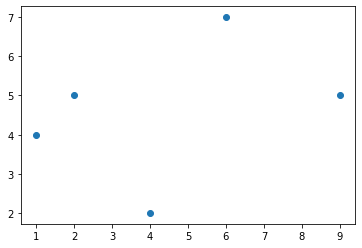

In [4]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)

Text(0, 0.5, 'temperature')

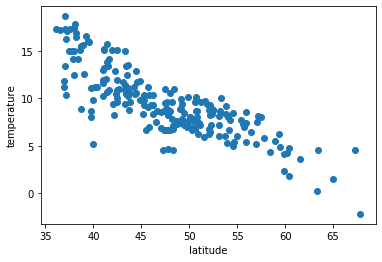

In [6]:
# Scatterplot of temperature (y) versus latitude (x)
x = []
y = []
for city in cities:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.scatter(x, y)
# Add labels to axes
plt.xlabel('latitude')
plt.ylabel('temperature')

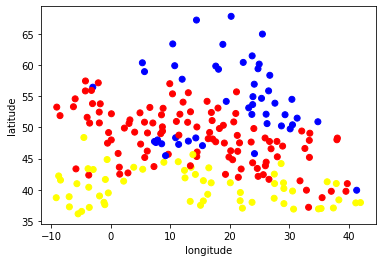

In [7]:
# Scatterplot of latitude (y) versus longitude (x) colored by temperature
x = []
y = []
colors = []
for city in cities:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 7:
        colors.append('blue')
    elif float(city['temperature']) < 11:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

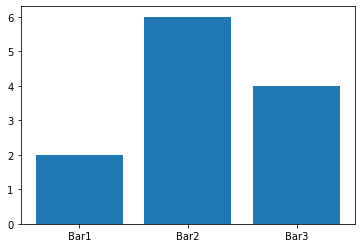

In [8]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.xticks([0,1,2], bars)
plt.bar([0,1,2], heights)
plt.show()

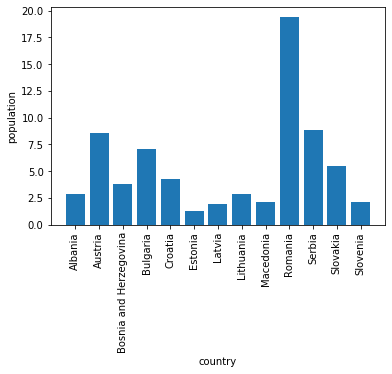

In [9]:
# Bar chart showing populations of countries with 'ia' in their name
bars = [] # countries with 'ia' in their name
heights = [] # population of those countries
for country in countries:
    if 'ia' in country['country']:
        bars.append(country['country'])
        heights.append(float(country['population']))
numbars = len(bars)
# range(numbars) in following command yields [0,1,...,numbars-1]
plt.xticks(range(numbars), bars, rotation='vertical')
plt.bar(range(numbars), heights)
plt.xlabel('country')
plt.ylabel('population')
plt.show()

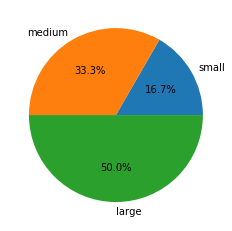

In [10]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

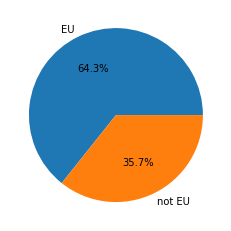

In [11]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countries:
    if country['EU'] == 'yes':
        numEU += 1
    else:
        numNotEU +=1
sizes = [numEU, numNotEU]
lbls = ['EU', 'not EU']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

### <font color="green">Your Turn: World Cup Data</font>

In [12]:
# Read Players.csv and Teams.csv into lists of dictionaries
players = []
with open('Players.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        players.append(r)
teams = []
with open('Teams.csv','rU') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teams.append(r)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


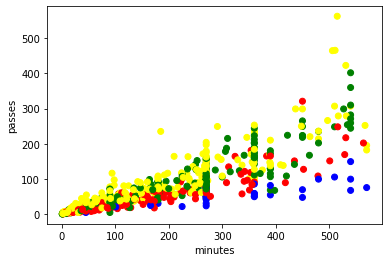

In [13]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
x = []
y = []
colors = []
for player in players:
    x.append(float(player['minutes']))
    y.append(float(player['passes']))
    if player['position'] == 'goalkeeper':
        colors.append('blue')
    elif player['position'] == 'defender':
        colors.append('green')
    elif player['position'] == 'midfielder':
        colors.append('yellow')
    else:
        colors.append('red')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(x, y, c=colors)
plt.show()

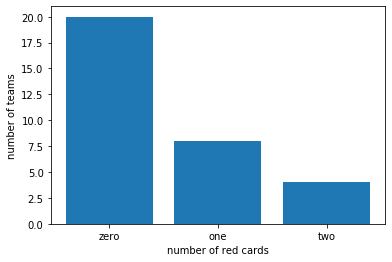

In [14]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly
bars = ['zero', 'one', 'two'] # number of red cards
heights = [0, 0, 0] # number of teams with zero/one/two red cards
bars = ['zero', 'one', 'two'] # number of red cards
heights = [0, 0, 0] # number of teams with zero/one/two red cards
for team in teams:
    heights[int(team['redCards'])] += 1
plt.xticks([0,1,2], bars)
plt.bar([0,1,2], heights)
plt.xlabel('number of red cards')
plt.ylabel('number of teams')
plt.show()

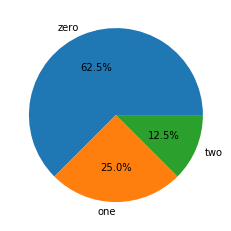

In [15]:
# Create a pie chart showing the relative percentage of teams
# with 0, 1, and 2 red cards.
# Reminder: redCards is a string, so convert or compare accordingly
lbls = ['zero', 'one', 'two']
sizes = [0, 0, 0]
for team in teams:
    sizes[int(team['redCards'])] += 1
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

Enter a team, or enter quit to stop: Portugal


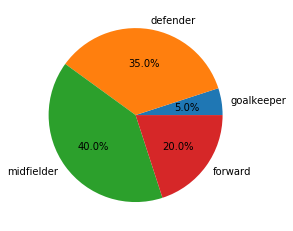

Enter a team, or enter quit to stop: quit


In [18]:
# BONUS!
# Write a loop that interactively asks the user to enter a team name.
# If the team exists, create a pie chart showing how many players the team
# has in each of the four positions.
# If the team doesn't exist, print "Team not in 2010 World Cup".
# If 'quit' is entered, terminate the loop.
# Note: To read a string from the user instead of a number, use
# raw_input() instead of input()
names = []
for team in teams:
    names.append(team['team'])
while True:
    team = input('Enter a team, or enter quit to stop: ')
    if team == 'quit': break
    elif team not in names:
        print('Team not in 2010 World Cup')
    else:
        pos = {'goalkeeper': 0, 'defender': 0, 'midfielder': 0, 'forward': 0}
        for player in players:
            if player['team'] == team:
                pos[player['position']] += 1
        sizes = [pos['goalkeeper'], pos['defender'], pos['midfielder'], pos['forward']]
        lbls = ['goalkeeper', 'defender', 'midfielder', 'forward']
        plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
        plt.show()